In [1]:
import numpy as np
import matplotlib.pyplot as plt
import os
import glob
from Training2D import Trainer2D
import tensorflow as tf
from tensorflow import keras
from Data_Generation import *
import keras.backend as K

Using TensorFlow backend.


In [2]:
m=51
n=75
def ReadFile(fname):
    data=[]
    with open(fname) as fp:
        for i, line in enumerate(fp):
            data.append(line[:-1].split(','))
    data=np.array(data)
    data=data.astype(float)
    if (data.shape[0]==3876):
        Ind= ((np.arange(data.shape[0]) % 76) != 0)
        data=data[Ind, :]
    return data[:,2], data.shape[0], data[:, 3:]


def WriteFile(fname, data):
    with open(fname, 'w') as fp:
        for depth in data:
            fp.write(np.format_float_scientific(depth,precision=4, exp_digits=1))
            fp.write('\n')
            
    
    return 


In [3]:
path='SurveyFull/'
depth=[]
bathytime=[]
i=0
for filename in glob.glob(os.path.join(path, '*.txt')):
    i+=1
    #print(filename)
    try:
        dd, ll, xy=ReadFile(filename)
    except:
        print(filename)
    if (ll == 3825):
        print(len(depth))
        print(i)
        dd=np.reshape(dd, (m,n))
        #dd=-np.flip(dd)
        dd=np.reshape(dd, m*n)
        depth.append(dd)
        bathytime.append(filename)
    
depth=np.array(depth)
#depth=np.vstack(depth)


0
2
1
6
2
10
3
12
4
13
5
14
6
16
7
17
8
18
9
19
10
21
11
23
12
25
13
27
14
29
15
30
16
34
17
35
18
37
19
38
20
40
21
42
22
45
23
46
24
47
25
48
26
51
27
52
28
54
29
59
30
60
31
61
32
62
33
63
34
68
35
69
36
70
37
71
38
73
39
74
40
75
41
76
42
78
43
80
44
82
45
83
46
84
47
85
48
86
49
87
50
89
51
90
52
92
53
93
54
94
55
95
56
96
57
97
58
98
59
99
60
100
61
103
62
105
63
106
64
109
65
112
66
113
67
114
68
115
69
116
70
117
71
118
72
119
73
120
74
121
75
122
76
123
77
125
78
126
79
127
80
128
81
129
82
130
83
131
84
132
85
133
86
134
87
136
88
138
89
141
90
142
91
143
92
145
93
146
94
147
95
148
96
151
97
152
98
153
99
155
100
156
101
159
102
160
103
161
104
162
105
163
106
164
107
165
108
166
109
167
110
168
111
169
112
170
113
171
114
173
115
174
116
176
117
177
118
180
119
182
120
183
121
185
122
186
123
187
124
190
125
191
126
192
127
193
128
195
129
199
130
204
131
205
132
207
133
208
134
209
135
211
136
212
137
213
138
214
139
216
140
218
141
219
142
220
143
222
144
223
SurveyFull/F

In [4]:
SampleBathy=[]
SampleTime=[]
for ii in range(4):
    for jj in range(depth.shape[0]):
        #if (bathytime[jj][15:19]=='2000'):
#        SampleBathy.append(np.reshape(depth[jj],(m,n)))
#        SampleTime.append(bathytime[jj][15:23]) 
        print(bathytime[jj][15:23])
               


    

19930902
19911112
19941109
20060222
19911023
20151014
20111017
19930610
20181017
20140127
19991022
20041122
19960819
20170905
20140930
19960416
20001005
20171121
19981026
19950802
20000909
19900129
20050126
19960305
20060405
20100604
20020627
19980617
19910524
19901030
20010326
20060925
20160527
20071210
19910422
20070222
20160726
20160908
20120810
19920810
19940730
20150915
20181213
19990924
20170606
19980316
19950125
20120316
20011012
20180814
20130702
20100405
20151116
20100728
20120627
20121025
20101019
20070627
20100906
19911103
19891101
20121031
19970617
20010502
19910923
19860902
20131205
20071011
20040407
19960627
19941121
20040108
20040519
19970106
19930804
20130905
20151221
19910118
19971024
20190215
20121219
20170105
20040427
20150807
20190325
20120928
19990419
19961202
20070104
20100222
20161116
20181120
19980112
20110829
19890523
20060531
19960207
20030625
20141212
20010924
19940124
20110711
20010226
19930707
20020417
20050510
20161103
20001120
19911218
19960724
20170707
2

In [5]:
num_x=75
num_y=51
num_t=3
num_sample=200
ny_s=10
nx_s=10
freq=40

nug=0.4
r=0.07
p=1
param={'psill':p, 'range': r, 'nugget':nug}

river=[]
for i in range(239):
    rr=np.reshape(depth[i,:num_y*num_x], (num_y, num_x))
    river.append(rr)

Tn=Trainer2D(num_x, num_y, num_t, num_sample, ny_s, nx_s, freq, param, river)

In [ ]:
Tn.GenerateData(109)

In [6]:
def totalvariation(y_true, y_pred, num_x, num_y, ll, bs):
    y_temp=K.reshape(y_pred, (bs, num_y, num_x))
    tv=K.sum(K.abs(y_temp[:,2:,1:-1]-y_temp[:,1:-1,1:-1]))+\
    K.sum(K.abs(y_temp[:,0:-2,1:-1]-y_temp[:,1:-1,1:-1]))+\
    K.sum(K.abs(y_temp[:,1:-1,0:-2]-y_temp[:,1:-1,1:-1]))+\
    K.sum(K.abs(y_temp[:,1:-1,2:]-y_temp[:,1:-1,1:-1]))
    tv/=num_y*num_x
    return K.mean(K.abs(y_true-y_pred)**2)+ll*tv


def tvloss(num_x, num_y, ll, bs):
    def tvlos(y_true, y_pred):
        return totalvariation(y_true, y_pred, num_x, num_y, ll, bs)
    return tvlos


def l0tv(y_true, y_pred, num_x, num_y, ll, bs, thres):
    y_temp=K.reshape(y_pred, (bs, num_y, num_x))
#    tv=K.sum(K.cast(K.abs(y_temp[:,2:,1:-1]-y_temp[:,1:-1,1:-1])>thres, 'float32'))+\
#    K.sum(K.cast(K.abs(y_temp[:,0:-2,1:-1]-y_temp[:,1:-1,1:-1])>thres, 'float32'))+\
#    K.sum(K.cast(K.abs(y_temp[:,1:-1,0:-2]-y_temp[:,1:-1,1:-1])>thres, 'float32'))+\
#    K.sum(K.cast(K.abs(y_temp[:,1:-1,2:]-y_temp[:,1:-1,1:-1])>thres, 'float32'))
    tv=K.sum(K.sigmoid(K.abs(y_temp[:,2:,1:-1]-y_temp[:,1:-1,1:-1])-thres))+\
    K.sum(K.sigmoid(K.abs(y_temp[:,0:-2,1:-1]-y_temp[:,1:-1,1:-1])-thres))+\
    K.sum(K.sigmoid(K.abs(y_temp[:,1:-1,0:-2]-y_temp[:,1:-1,1:-1])-thres))+\
    K.sum(K.sigmoid(K.abs(y_temp[:,1:-1,2:]-y_temp[:,1:-1,1:-1])-thres))
    return K.mean(K.abs(y_true-y_pred)**2)+ll*tv


def tvl0loss(num_x, num_y, ll, bs, thres):
    def tvl0los(y_true, y_pred):
        return l0tv(y_true, y_pred, num_x, num_y, ll, bs, thres)
    return tvl0los

In [7]:
Tn.LoadData(109,0.1)

(array([[ 2.60727989e-057, -1.30363995e-057, -1.30363995e-057, ...,
         -7.47012457e-058, -1.07952430e-057,  1.71572723e-057],
        [ 5.18772282e+000, -2.10038933e+000, -4.06288974e+000, ...,
         -6.98739171e+000, -7.81318797e+000, -8.11279872e+000],
        [ 5.20658423e+000, -2.02558400e+000, -3.97933460e+000, ...,
         -7.07908756e+000, -7.91928195e+000, -8.15519808e+000],
        ...,
        [ 4.60073271e-145, -2.86576379e-125, -5.23601099e-125, ...,
          5.25876388e-069, -1.54892590e-069, -6.08898285e-069],
        [ 4.81722952e+000, -2.33641916e+000, -3.88208827e+000, ...,
         -6.95398909e+000, -7.86518642e+000, -8.12641307e+000],
        [ 4.84584428e+000, -2.18462875e+000, -3.96813241e+000, ...,
         -6.89798363e+000, -7.93977963e+000, -8.20061961e+000]]),
 array([[ 2.60727989e-057,  2.55030457e-057,  2.38186870e-057, ...,
          1.79343564e-057,  2.02514683e-057,  2.16833741e-057],
        [ 5.18772282e+000,  3.61334791e+000,  2.26717913e+000

In [8]:
Hidden_layer=[2000, 2000]
fname='relu'
Optimizer = tf.compat.v1.train.AdamOptimizer(0.001)
##Optmizer = keras.optimizers.SGD(0.001, decay=1e-1)
Regularizer=0.000
Reg=keras.regularizers.l2(Regularizer)
los1=tvl0loss(Tn.num_x, Tn.num_y, 1e-1,4,2.5)
los2=tvloss(Tn.num_x, Tn.num_y, 1e-2,16)
los3='mse'
#Tn.model['L1'].summary()

KeyError: 'L1'

In [9]:

Tn.CreateNetwork(Hidden_layer, fname, Reg, 'L1')
Tn.TrainNetwork(tf.compat.v1.train.AdamOptimizer(0.001), 2, 'L1',los3)

Tn.TrainNetwork(tf.compat.v1.train.AdamOptimizer(0.0001), 2, 'L1',los3)


Tn.TrainNetwork(tf.compat.v1.train.AdamOptimizer(0.0000001), 2, 'L1', los3)

Train on 129056 samples, validate on 14344 samples
Epoch 1/2
129056/129056 [==============================] - 29s 223us/sample - loss: 1.0968 - mae: 0.6000 - val_loss: 0.6968 - val_mae: 0.4907
Epoch 2/2
129056/129056 [==============================] - 18s 137us/sample - loss: 0.5772 - mae: 0.4502 - val_loss: 0.5998 - val_mae: 0.4427
Train on 129056 samples, validate on 14344 samples
Epoch 1/2
129056/129056 [==============================] - 18s 137us/sample - loss: 0.3143 - mae: 0.3082 - val_loss: 0.3195 - val_mae: 0.3132
Epoch 2/2
129056/129056 [==============================] - 17s 134us/sample - loss: 0.2825 - mae: 0.2911 - val_loss: 0.2959 - val_mae: 0.3018
Train on 129056 samples, validate on 14344 samples
Epoch 1/2
129056/129056 [==============================] - 18s 138us/sample - loss: 0.2678 - mae: 0.2826 - val_loss: 0.2921 - val_mae: 0.2981
Epoch 2/2
129056/129056 [==============================] - 17s 132us/sample - loss: 0.2655 - mae: 0.2803 - val_loss: 0.2906 - val_mae: 0.

In [ ]:
def ENCODER(image_shape=(256,256,3)):
	# weight initialization
	init = RandomNormal(stddev=0.02)
	# image input
	in_image = Input(shape=image_shape)
	# encoder model
	e1 = define_encoder_block(in_image, 64, (1,2), batchnorm=False)
	e2 = define_encoder_block(e1, 128)
	e3 = define_encoder_block(e2, 256)
	#e4 = define_encoder_block(e3, 512)
	#e5 = define_encoder_block(e4, 512)
	#e6 = define_encoder_block(e5, 512)
	#e7 = define_encoder_block(e6, 512)
	# bottleneck, no batch norm and relu
	b = Conv2D(512, (4,4), strides=(2,2), padding='same',  kernel_initializer=init)(e3)
	print(b.shape)
	b = Activation('relu')(b)
	# decoder model
	#d1 = decoder_block(b, e7, 512)
	#d2 = decoder_block(d1, e6, 512)
	#d3 = decoder_block(d2, e5, 512)
	#d4 = decoder_block(d3, e4, 512, dropout=False)
	d5 = decoder_block(b, e3, 256)
	d6 = decoder_block(d5, e2, 128)
	d7 = decoder_block(d6, e1, 64)
	# output
	g = Conv2DTranspose(1, (4,4), strides=(2,2), padding='same', kernel_initializer=init)(d7)
	out_layer = Activation('tanh')(g)
	out_layer = Flatten()(out_layer)
	out_layer = Dense(3200*9)(out_layer)
	out_layer = Dropout(0.5)(out_layer, training=True)
	out_layer = Reshape((40, 80,9))(out_layer)
	# define model
	model = Model(in_image, out_layer)
	return model



def DECODER(image_shape=(256,256,3)):
	# weight initialization
	init = RandomNormal(stddev=0.02)
	# image input
	in_image = Input(shape=image_shape)
	# encoder model
	e1 = define_encoder_block(in_image, 64, (1,2), batchnorm=False)
	e2 = define_encoder_block(e1, 128)
	e3 = define_encoder_block(e2, 256)
	#e4 = define_encoder_block(e3, 512)
	#e5 = define_encoder_block(e4, 512)
	#e6 = define_encoder_block(e5, 512)
	#e7 = define_encoder_block(e6, 512)
	# bottleneck, no batch norm and relu
	b = Conv2D(512, (4,4), strides=(2,2), padding='same',  kernel_initializer=init)(e3)
	print(b.shape)
	b = Activation('relu')(b)
	# decoder model
	#d1 = decoder_block(b, e7, 512)
	#d2 = decoder_block(d1, e6, 512)
	#d3 = decoder_block(d2, e5, 512)
	#d4 = decoder_block(d3, e4, 512, dropout=False)
	d5 = decoder_block(b, e3, 256)
	d6 = decoder_block(d5, e2, 128)
	d7 = decoder_block(d6, e1, 64)
	# output
	g = Conv2DTranspose(1, (4,4), strides=(2,2), padding='same', kernel_initializer=init)(d7)
	out_layer = Activation('tanh')(g)
	out_layer = Flatten()(out_layer)
	out_layer = Dense(3200*9)(out_layer)
	out_layer = Dropout(0.5)(out_layer, training=True)
	out_layer = Reshape((40, 80,9))(out_layer)
	# define model
	model = Model(in_image, out_layer)
	return model

In [15]:

def TakeAverage2(data, num_y, num_x, ny_s, nx_s):
    ay=(int)((num_y+ny_s-1)/ny_s)
    ax=(int)((num_x+nx_s-1)/nx_s)
    Temp=np.zeros((ay,ax))
    Area=np.zeros((ay,ax))
    for i in range(num_y):
        for j in range(num_x):
            ii = (int)(i/ny_s)
            jj = (int)(j/nx_s)
            Temp[ii,jj]+=data[i,j]
            Area[ii,jj]+=1
            
    Ans = np.divide(Temp, Area)
#    print(data.shape)
#    print(Temp.shape)
#    print(n_s)
    return Ans


EXXT= np.zeros((3825, 3825))
for i in range(239):
    test = np.reshape(depth[0,:], (1,3825))
    EXXT += test.T.dot(test)
EX =np.reshape(np.mean(depth[:239,:], axis=0), (3825,1))
EXXT= EXXT/239
EXEXT = EX.dot(EX.T)

In [16]:
from scipy.sparse import coo_matrix
import cvxpy as cp
row = []
col = []
data = []
tt = np.zeros((m,n))
tt[::ny_s,::nx_s]=1
M1 = tt[::ny_s,::nx_s].size
count=-1
for i in range(m):
    for j in range(n):
        if (tt[i,j]==1):
            count+=1
            row.append(count)
            col.append(i*n+j)
            data.append(1)
            
ay=(int)((num_y+ny_s-1)/ny_s)
ax=(int)((num_x+nx_s-1)/nx_s)
Temp=np.zeros((ay,ax))
Area=np.zeros((ay,ax))


for i in range(num_y):
    for j in range(num_x):
        ii = (int)(i/ny_s)
        jj = (int)(j/nx_s)
        Area[ii,jj]+=1
for i in range(num_y):
    for j in range(num_x):
        ii = (int)(i/ny_s)
        jj = (int)(j/nx_s)
        row.append(ii*ax+jj+M1)
        col.append(i*n+j)
        data.append(1/Area[ii,jj])
        #Area[ii,jj]+=1
            
#%%
rowL = []
colL = []
dataL = []
count = -1
for i in range(m):
    for j in range(n):
        if (i>0):
            count+=1
            rowL.append(count)
            colL.append(i*n+j)
            dataL.append(1)
            rowL.append(count)
            colL.append((i-1)*n+j)
            dataL.append(-1)
        if (i<m-1):
            count+=1
            rowL.append(count)
            colL.append(i*n+j)
            dataL.append(1)
            rowL.append(count)
            colL.append((i+1)*n+j)
            dataL.append(-1)
        if (j>0):
            count+=1
            rowL.append(count)
            colL.append(i*n+j)
            dataL.append(1)
            rowL.append(count)
            colL.append((i)*n+j-1)
            dataL.append(-1)
        if (j<n-1):
            count+=1
            rowL.append(count)
            colL.append(i*n+j)
            dataL.append(1)
            rowL.append(count)
            colL.append(i*n+j+1)
            dataL.append(-1)
            
            
rowL=np.array(rowL)
colL=np.array(colL)
dataL=np.array(dataL)
L = coo_matrix((dataL, (rowL, colL)), shape=(2*4+(m-2+n-2)*2*3+((m-2)*(n-2))*4, num_x*num_y))  
L = L.astype(float)
row=np.array(row)
col=np.array(col)
data=np.array(data)
H = coo_matrix((data, (row, col)), shape=(M1+ax*ay, num_x*num_y))
x_coord, y_coord=np.meshgrid(Tn.xx2,Tn.yy2, sparse=False)
nn=0.1
r=0.07
p=1
s=0.1
covar0= lambda x : p*np.exp(-(x**2)/(r**2))+nn
covar1= lambda x : p*np.exp(-(x)/(r))+nn
x_coord=np.reshape(x_coord, (num_y*num_x,1))
y_coord=np.reshape(y_coord, (num_y*num_x,1))
covar2= lambda x : p-s*x
Q00=Cov(x_coord, y_coord, covar1)
#Q00 = EXXT - EXEXT
Qin = np.linalg.inv(Q00)
Identity = np.identity(num_x*num_y)
Qin_g = np.linalg.inv(0.15*0.15*np.matmul(Tn.Cov.T, Tn.Cov)+0.0001*Identity+EXXT)

In [24]:
nn=0.1
r=0.4
p=1
s=0.1
covar0= lambda x : p*np.exp(-(x**2)/(r**2))+nn
covar1= lambda x : p*np.exp(-(x)/(r))+nn
covar2= lambda x : p+s*x
#ind=np.random.randint(0,4000)
ind=np.random.randint(0,270)
ind=255
#rr=np.reshape(Tn.d[3*ind+1,:],(m,n))
#ind=0
#rr=-np.copy(np.reshape(Tn.d[ind,:], (m,n)))
rr=(np.copy(np.reshape(depth[ind,:], (m,n))))
x,y=np.meshgrid(Tn.xx2,Tn.yy2,sparse=False)
jump,x0, y0=random_jump_v(x,y,1,0.15, 0.5, 24)
jump=np.abs(jump)
original = np.copy(rr)
#rr+=jump

#rr = np.copy(rr)+np.random.normal(0,0.1,rr0.shape)
vv = TakeAverage2(rr, Tn.num_y, Tn.num_x, Tn.ny_s, Tn.nx_s)
vv2  = TakeAverage2(original, Tn.num_y, Tn.num_x, Tn.ny_s, Tn.nx_s)
#rr+=jump
Label=np.reshape(vv, (1,vv.shape[0]*vv.shape[1]))
Label=Concat(Tn.Sparse(rr), Label)
Label += np.random.normal(0,0.1, Label.shape)
Label2=np.reshape(vv2, (1,vv2.shape[0]*vv2.shape[1]))
Label2=Concat(Tn.Sparse(original), Label2)

x_coord, y_coord=np.meshgrid(Tn.xx2,Tn.yy2, sparse=False)

data_out, Qyy, Qy0=kriging(x_coord, y_coord, Tn.Sparse(rr) ,Tn.ny_s, Tn.nx_s, covar2)
dok=np.reshape(data_out,(Tn.num_y, Tn.num_x))
#dl=Tn.model['L1'].predict(np.reshape(Label, (1, Label.shape[1])))
dl=Tn.model['L1'].predict(np.reshape(Label, (1, Label.shape[1])))
dl=np.reshape(dl,(m,n))

In [25]:
x = cp.Variable(num_x*num_y)
x2 = cp.Variable(num_x*num_y)
x3 = cp.Variable(num_x*num_y)
y = np.reshape(Label,(Label.size))
y2 = np.reshape(Label2, (Label.size))
mu = np.mean(y)*np.ones(num_y*num_x)
mu = np.reshape(dl, (num_y*num_x))
mu_g = np.mean(depth[:240,:], axis=0)

Optimal value -2008.5938100560916
Optimal var
[ 2.9913587   2.74775072  2.41001538 ... -8.68956686 -8.69773776
 -8.78106513]


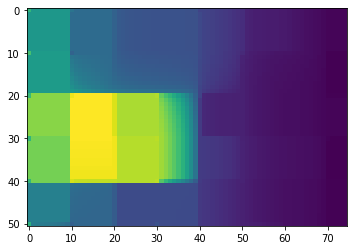

In [152]:
HTy = H.T.dot(y)
HTy2 = H.T.dot(y)
LLambda=0.00001
Lambda2 = 0.00001
#objective = cp.Minimize(0.5*cp.quad_form(x, H.T.dot(H)+Qin)- (HTy.T+mu.T.dot(Qin)) @ x + 0.15 * cp.norm(L @ x, 1))
objective2 = cp.Minimize(cp.norm(H @ x2 -y, 2)**2 + 0.001 * cp.norm(L @ x2, 1))
objective = cp.Minimize(0.5*cp.quad_form(x, H.T.dot(H)+LLambda*Qin) - (HTy.T+mu.T.dot(LLambda*Qin)) @ x)
objective3 = cp.Minimize(0.5*cp.quad_form(x3, H.T.dot(H)+Lambda2*Qin) - (HTy2.T+mu_g.T.dot(Lambda2*Qin)) @ x3)
#objective = cp.Minimize(cp.norm(H @ x -y, 2)**2 + 0.1 * cp.norm(L @ x, 1))
#objective = cp.Minimize(cp.norm(H @ x -y, 2)**2)
prob = cp.Problem(objective)
prob2 = cp.Problem(objective2)
prob3 = cp.Problem(objective3)
prob2.solve()
print("Optimal value", prob.solve())
print("Optimal var")
print(x.value) # A numpy ndarray.
prob3.solve()

xx = np.array(x.value)
xx2 = np.array(x2.value)
xx3 = np.array(x3.value)
xx = np.reshape(xx,(num_y,num_x))
xx2 = np.reshape(xx2,(num_y,num_x))
xx3 = np.reshape(xx3,(num_y,num_x)) 
plt.imshow(xx2)

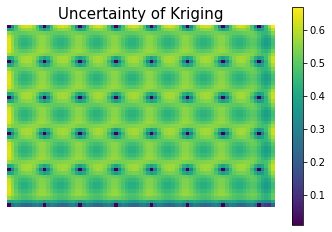

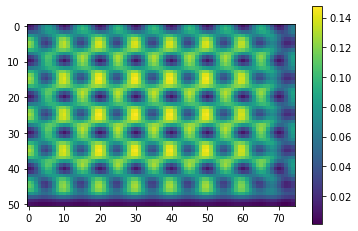

In [26]:
R = 0.01*np.identity((Tn.v.shape[1]))
R[48:,48:]*=0.1
Rinv = np.linalg.inv(R)
Qsyinv_g = Qin_g+H.T.dot((H.T.dot(Rinv.T)).T)
Qsyinv = Qin+H.T.dot((H.T.dot(Rinv.T)).T)
Qsy = np.linalg.inv(Qsyinv)
Qsy_g = np.linalg.inv(Qsyinv_g)
uq_k = np.reshape(np.diag(Qsy),(51,75))
plt.imshow(np.reshape(np.diag(Qsy),(51,75)))
plt.axis('off')
plt.title('Uncertainty of Kriging', fontsize=15)
plt.colorbar()
plt.figure()
kk=2
plt.imshow(np.reshape(np.diag(Qsy_g),(51,75)))
plt.colorbar()

In [27]:
#muu = np.mean(y)*np.ones(num_y*num_x)
y = np.reshape(Label,(Label.size))
mu = np.reshape(dl, (num_y*num_x))
xx3 = mu_g + Qsy.dot(H.T.dot(Rinv.dot(y-H.dot(mu_g))))
gt = mu_g + Qsy_g.dot(H.T.dot(Rinv.dot(y-H.dot(mu_g))))
xx = mu + Qsy.dot(H.T.dot(Rinv.dot(y-H.dot(mu))))
xx = np.reshape(xx,(num_y,num_x))
xx3 = np.reshape(xx3,(num_y,num_x)) 
gt=np.reshape(gt,(51,75))

In [20]:
from numpy import asarray
from numpy.random import randn
from numpy.random import randint
from keras.models import load_model
import matplotlib.pyplot as plt
cgan_model = load_model('FixedMagnitudeSizeGenerator.h5')

/home/adncat/.conda/envs/qyz/lib/python3.7/site-packages/keras/engine/saving.py:341: UserWarning: No training configuration found in save file: the model was *not* compiled. Compile it manually.
  warnings.warn('No training configuration found in save file: '


In [21]:
def generate_latent_points(dataset, latent_dim, n_samples, n_classes=10):
    images, labels = dataset
    ix = np.random.randint(0, images.shape[0], n_samples)
	# generate points in the latent space
    x_input = randn(latent_dim * n_samples)
	# reshape into a batch of inputs for the network
    z_input = x_input.reshape(n_samples, latent_dim)
	# generate labels
    labels2 = labels[ix] 
    return [z_input, labels2]


IMAGESTD=np.std(Tn.d,axis=0)
IMAGEMEAN=np.mean(Tn.d,axis=0)
LABELSTD=np.std(Tn.v,axis=0)
LABELMEAN=np.mean(Tn.v,axis=0)

In [28]:
NumofSampling=1000
labeldim=96
dataset = [Tn.d, Tn.v]
latent_points, labels = generate_latent_points(dataset, 59, NumofSampling)
Label2=(Label-LABELMEAN)/LABELSTD
TT=np.zeros((NumofSampling,labeldim))
TT[0:,:]=Label2

X  = cgan_model.predict([latent_points, TT])
X  = np.reshape(X, (X.shape[0], num_y * num_x))
X  = IMAGEMEAN+X*IMAGESTD
X_mean = np.mean(X,axis=0)
X_mean = np.reshape(X_mean, (51,75))

In [29]:
def PlotandCompare(d, dd, n, norm, filename, Save=False, Error=True, ind=0, v1=0, v2=7):
    if (norm=='mse'):
        f=lambda x,y: np.mean((x-y)**2)**(0.5)
    else:
        f=lambda x,y: np.mean(np.abs(x-y))
    err=np.zeros(len(d))
    fig = plt.figure(figsize=(10,12))
    iplot=420
    for i in range(len(d)):
        iplot+=1
        err[i]=f(d[i],dd)
        s=n[i]
        if (Error):
            if (n[i] != 'Groundtruth' and n[i] != 'Reference'):
                s+=": "+norm+"= "+np.format_float_scientific(err[i],precision=2, exp_digits=1)
        ax = fig.add_subplot(iplot)
        im = ax.imshow(-d[i], vmin=-v2-2, vmax=-v1)
        ax.set_title(s, fontsize=15)
        ax.set_axis_off()
        cbar = fig.colorbar(im)
    
            
    #cb_ax = fig.add_axes([0.95, 0.02, 0.02, 0.85])
    #cbar = fig.colorbar()
    plt.subplots_adjust(hspace=0.15, wspace=0.05)
    if (Save):
        plt.savefig(filename+".pdf", dpi=300, bbox_inches='tight')
    plt.show()

    return

In [39]:
nn=0.1
r=0.4
p=1
s=0.1
covar0= lambda x : p*np.exp(-(x**2)/(r**2))+nn
covar1= lambda x : p*np.exp(-(x)/(r))+nn
covar2= lambda x : p+s*x
#ind=np.random.randint(0,4000)
ind=np.random.randint(0,270)
ind=261
#rr=np.reshape(Tn.d[3*ind+1,:],(m,n))
#ind=0
#rr=-np.copy(np.reshape(Tn.d[ind,:], (m,n)))
rr=(np.copy(np.reshape(depth[ind,:], (m,n))))
x,y=np.meshgrid(Tn.xx2,Tn.yy2,sparse=False)
#jump,x0, y0=random_jump_v(x,y,1,0.15, 0.5, 24)
jump=np.abs(jump)
jump = np.load('Regjump.npy')
original = np.copy(rr)
#rr+=jump
#rr = np.load('Regfile.npy')
#rr = np.copy(rr)+np.random.normal(0,0.1,rr0.shape)
vv = TakeAverage2(rr, Tn.num_y, Tn.num_x, Tn.ny_s, Tn.nx_s)
vv2  = TakeAverage2(original, Tn.num_y, Tn.num_x, Tn.ny_s, Tn.nx_s)
#rr+=jump
Label=np.reshape(vv, (1,vv.shape[0]*vv.shape[1]))
Label=Concat(Tn.Sparse(rr), Label)
Label += np.random.normal(0,0.1, Label.shape)
Label2=np.reshape(vv2, (1,vv2.shape[0]*vv2.shape[1]))
Label2=Concat(Tn.Sparse(original), Label2)

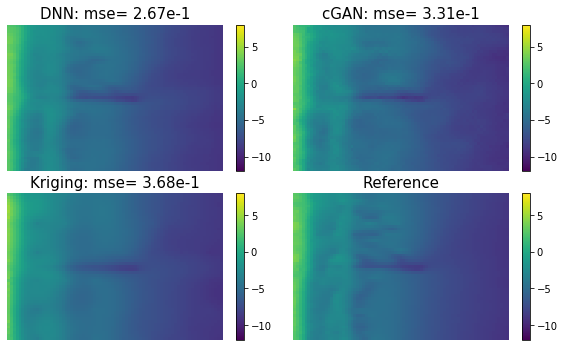

In [46]:
x_coord, y_coord=np.meshgrid(Tn.xx2,Tn.yy2, sparse=False)

data_out, Qyy, Qy0=kriging(x_coord, y_coord, Tn.Sparse(rr) ,Tn.ny_s, Tn.nx_s, covar2)
dok=np.reshape(data_out,(Tn.num_y, Tn.num_x))
#dl=Tn.model['L1'].predict(np.reshape(Label, (1, Label.shape[1])))
dl=Tn.model['L1'].predict(np.reshape(Label, (1, Label.shape[1])))
dl=np.reshape(dl,(m,n))

NumofSampling=1000
labeldim=96
dataset = [Tn.d, Tn.v]
latent_points, labels = generate_latent_points(dataset, 59, NumofSampling)
Label2=(Label-LABELMEAN)/LABELSTD
TT=np.zeros((NumofSampling,labeldim))
TT[0:,:]=Label2

X  = cgan_model.predict([latent_points, TT])
X  = np.reshape(X, (X.shape[0], num_y * num_x))
X  = IMAGEMEAN+X*IMAGESTD
X_mean = np.mean(X,axis=0)
X_mean = np.reshape(X_mean, (51,75))

Qin+H.T.dot((H.T.dot(Rinv.T)).T)
mu_g = np.mean(y)*np.ones(num_y*num_x)
mu_gt = np.mean(depth[:240,:], axis=0)
#mu_gt = np.mean(y)*np.ones(num_y*num_x)
y = np.reshape(Label,(Label.size))
y2 = H.dot(np.reshape(original, (3825, 1)))+np.random.normal(0,0.1,(96,1))
y2 = np.reshape(y2, (96,))
#mu = np.reshape(dl, (num_y*num_x))
#mu = np.reshape(X_mean, (num_y*num_x))
#mu = np.reshape(X_mean, (num_y*num_x))
xx3 = mu_gt + Qsy.dot(H.T.dot(Rinv.dot(y-H.dot(mu_gt))))
xx = mu + Qsy.dot(H.T.dot(Rinv.dot(y-H.dot(mu))))
xx = np.reshape(xx,(num_y,num_x))
xx3 = np.reshape(xx3,(num_y,num_x)) 
gt = mu_gt + Qsy_g.dot(H.T.dot(Rinv.dot(y2-H.dot(mu_gt)))) 
gt=np.reshape(gt,(51,75))
#gt += jump

dl=Tn.model['L1'].predict(np.reshape(Label, (1, Label.shape[1])))
#dl=pred_model.predict(np.reshape(Label, (1, Label.shape[1])))
dl=np.reshape(dl,(m,n))
#dl2=Tn.model['Original'].predict(np.reshape(Label, (1, Label.shape[1])))
#dl=pred_model.predict(np.reshape(Label, (1, Label.shape[1])))
#dl2=np.reshape(dl2,(m,n))

#D=[-xx,-dl,-X_mean,-xx3, -rr]
#D=[-xx,-dl,-dl2,-rr]
D=[-dl,-X_mean,-xx3, -rr]
name2=['DNN-Kriging', 'DNN', 'cGAN', 'Kriging', 'Reference']
name2=[ 'DNN', 'cGAN', 'Kriging', 'Reference']
#Tn.PlotandCompare(D, -rr,name2, 'mse', 'DirectPointwise+Average16', True, True, 2, -10, 10)
PlotandCompare(D, -rr,name2, 'mse', 'DirectPointwise+Average16', True, True, 2, -8, 10)

In [155]:
plt.imshow(y-H.dot(dl))
plt.colorbar()

ValueError: dimension mismatch

<Figure size 432x288 with 0 Axes>

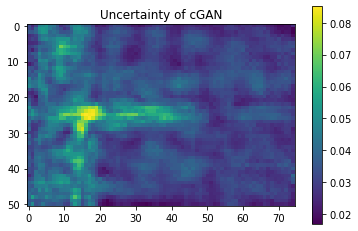

<Figure size 432x288 with 0 Axes>

In [44]:
plt.imshow(np.reshape(np.std(X, axis=0), (51,75)))
uq_cgan = np.reshape(np.std(X, axis=0), (51,75))
plt.title('Uncertainty of cGAN')
plt.colorbar()
plt.figure()

In [46]:


#print(test.T.dot(test).shape)

In [ ]:

plt.imshow((rr-xx3)**2, vmax=1)
plt.colorbar()
plt.show()
plt.figure()
plt.imshow((xx-dl)**2)
plt.colorbar()
plt.show()

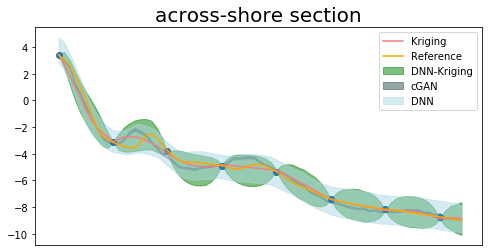

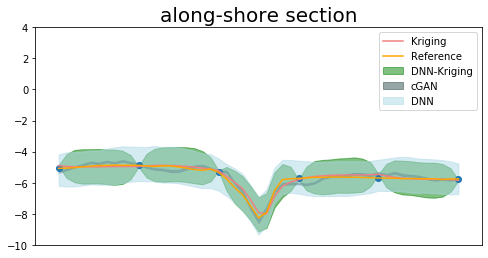

In [45]:


#plt.plot(np.squeeze(Tn.xx2), X_mean[np.argmin(np.abs(Tn.yy2-y0)),:], label="cGAN")
loc_y =np.argmin(np.abs(Tn.yy2-y0))
loc_y = 20
plt.figure(figsize=(8,4))
plt.plot(np.squeeze(Tn.xx2), xx3[loc_y,:], label="Kriging", color='lightcoral')
plt.fill_between(np.squeeze(Tn.xx2), (xx+2*uq_k)[loc_y,:], (xx-2*uq_k)[loc_y,:], color = 'green', alpha=.5, label='DNN-Kriging')
plt.fill_between(np.squeeze(Tn.xx2), (X_mean+2*uq_cgan)[loc_y,:], (X_mean-2*uq_cgan)[loc_y,:], color = 'darkslategrey', alpha=.5, label='cGAN')
plt.plot(np.squeeze(Tn.xx2), rr[loc_y,:], label="Reference", color='orange')
    #if ((i==0) or (i==1) or (i==4)):
plt.fill_between(np.squeeze(Tn.xx2), (dl+2*uq)[loc_y,:], (dl-2*uq)[loc_y,:], color = 'lightblue', alpha=.5, label='DNN')
#plt.plot(np.squeeze(Tn.xx2), xx2[loc_y,:],label='TV', color='yellowgreen')
#plt.plot(np.squeeze(Tn.xx2), dlr[np.argmin(np.abs(Tn.yy2-y0)),:],label="nnrk")
plt.scatter(np.squeeze(Tn.xx2)[::nx_s], rr[loc_y,::nx_s])
plt.legend()
plt.title("across-shore section",fontsize=20)

plt.tick_params(
    axis='x',          # changes apply to the x-axis
    which='both',      # both major and minor ticks are affected
    bottom=False,      # ticks along the bottom edge are off
    top=False,         # ticks along the top edge are off
    labelbottom=False) # labels along the bottom edge are off
plt.savefig("DirectPointwise+Averageacross-shore16.pdf", bbox_inches='tight')
plt.show()
plt.close()
loc_x = np.argmin(np.abs(Tn.xx2-x0))
loc_x = 40
plt.figure(figsize=(8,4))
#plt.plot(np.squeeze(Tn.yy2), xx[:,loc_x], label="Kriging-DNN", color='lime')
plt.plot(np.squeeze(Tn.yy2), xx3[:,loc_x], label="Kriging", color='lightcoral')
#plt.plot(np.squeeze(Tn.yy2), X_mean[:,loc_x], label="cGAN")
plt.plot(np.squeeze(Tn.yy2), rr[:,loc_x], label="Reference", color='orange')
    #if ((i==0) or (i==1) or (i==4)):

plt.fill_between(np.squeeze(Tn.yy2), (xx+2*uq_k)[:,loc_x], (xx-2*uq_k)[:,loc_x], color = 'green', alpha=.5, label='DNN-Kriging')
plt.fill_between(np.squeeze(Tn.yy2), (X_mean+2*uq_cgan)[:,loc_x], (X_mean-2*uq_cgan)[:,loc_x], color = 'darkslategrey', alpha=.5, label='cGAN')
plt.fill_between(np.squeeze(Tn.yy2), (dl+2*uq)[:,loc_x], (dl-2*uq)[:,loc_x], color = 'lightblue', alpha=.5, label='DNN')
#plt.plot(np.squeeze(Tn.yy2), xx2[:,loc_x],label='TV', color='yellowgreen')
#plt.plot(np.squeeze(Tn.yy2), (dl+uq)[:,loc_x],label='DNN+')
#plt.plot(np.squeeze(Tn.yy2), (dl-uq)[:,loc_x],label='DNN-')

#plt.plot(np.squeeze(Tn.yy2), dlr[:,np.argmin(np.abs(Tn.xx2-x0))],label="nnrk")
plt.scatter(np.squeeze(Tn.yy2)[::ny_s], rr[::ny_s,loc_x])
plt.legend()
#plt.ylim((-12,2))
yint = np.arange(-10, 5, 2)
plt.yticks(yint)
plt.title("along-shore section", fontsize=20)
plt.tick_params(
    axis='x',          # changes apply to the x-axis
    which='both',      # both major and minor ticks are affected
    bottom=False,      # ticks along the bottom edge are off
    top=False,         # ticks along the top edge are off
    labelbottom=False) # labels along the bottom edge are off
plt.savefig("DirectPointwise+Averagealong-shore16.pdf", bbox_inches='tight')
plt.show()

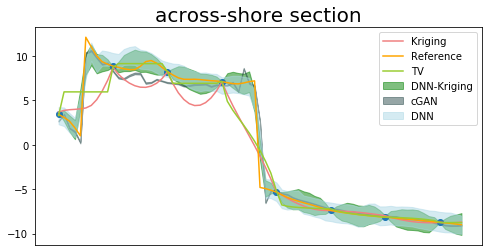

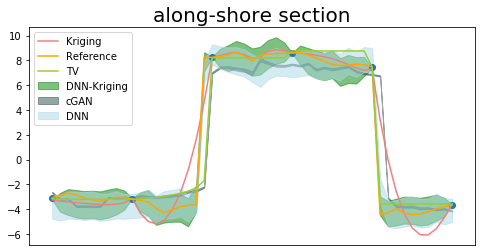

In [404]:


#plt.plot(np.squeeze(Tn.xx2), X_mean[np.argmin(np.abs(Tn.yy2-y0)),:], label="cGAN")
loc_y =np.argmin(np.abs(Tn.yy2-y0))
loc_y = 20
plt.figure(figsize=(8,4))
plt.plot(np.squeeze(Tn.xx2), xx3[loc_y,:], label="Kriging", color='lightcoral')
plt.fill_between(np.squeeze(Tn.xx2), (xx+2*uq_k)[loc_y,:], (xx-2*uq_k)[loc_y,:], color = 'green', alpha=.5, label='DNN-Kriging')
plt.fill_between(np.squeeze(Tn.xx2), (X_mean+2*uq_cgan)[loc_y,:], (X_mean-2*uq_cgan)[loc_y,:], color = 'darkslategrey', alpha=.5, label='cGAN')
plt.plot(np.squeeze(Tn.xx2), rr[loc_y,:], label="Reference", color='orange')
    #if ((i==0) or (i==1) or (i==4)):
plt.fill_between(np.squeeze(Tn.xx2), (dl+2*uq)[loc_y,:], (dl-2*uq)[loc_y,:], color = 'lightblue', alpha=.5, label='DNN')
plt.plot(np.squeeze(Tn.xx2), xx2[loc_y,:],label='TV', color='yellowgreen')
#plt.plot(np.squeeze(Tn.xx2), dlr[np.argmin(np.abs(Tn.yy2-y0)),:],label="nnrk")
plt.scatter(np.squeeze(Tn.xx2)[::nx_s], rr[loc_y,::nx_s])
plt.legend()
plt.title("across-shore section",fontsize=20)

plt.tick_params(
    axis='x',          # changes apply to the x-axis
    which='both',      # both major and minor ticks are affected
    bottom=False,      # ticks along the bottom edge are off
    top=False,         # ticks along the top edge are off
    labelbottom=False) # labels along the bottom edge are off
plt.savefig("DirectPointwise+Averageacross-shore16.pdf", bbox_inches='tight')
plt.show()
plt.close()
loc_x = np.argmin(np.abs(Tn.xx2-x0))
loc_x = 20
plt.figure(figsize=(8,4))
#plt.plot(np.squeeze(Tn.yy2), xx[:,loc_x], label="Kriging-DNN", color='lime')
plt.plot(np.squeeze(Tn.yy2), xx3[:,loc_x], label="Kriging", color='lightcoral')
#plt.plot(np.squeeze(Tn.yy2), X_mean[:,loc_x], label="cGAN")
plt.plot(np.squeeze(Tn.yy2), rr[:,loc_x], label="Reference", color='orange')
    #if ((i==0) or (i==1) or (i==4)):

plt.fill_between(np.squeeze(Tn.yy2), (xx+2*uq_k)[:,loc_x], (xx-2*uq_k)[:,loc_x], color = 'green', alpha=.5, label='DNN-Kriging')
plt.fill_between(np.squeeze(Tn.yy2), (X_mean+2*uq_cgan)[:,loc_x], (X_mean-2*uq_cgan)[:,loc_x], color = 'darkslategrey', alpha=.5, label='cGAN')
plt.fill_between(np.squeeze(Tn.yy2), (dl+2*uq)[:,loc_x], (dl-2*uq)[:,loc_x], color = 'lightblue', alpha=.5, label='DNN')
plt.plot(np.squeeze(Tn.yy2), xx2[:,loc_x],label='TV', color='yellowgreen')
#plt.plot(np.squeeze(Tn.yy2), (dl+uq)[:,loc_x],label='DNN+')
#plt.plot(np.squeeze(Tn.yy2), (dl-uq)[:,loc_x],label='DNN-')

#plt.plot(np.squeeze(Tn.yy2), dlr[:,np.argmin(np.abs(Tn.xx2-x0))],label="nnrk")
plt.scatter(np.squeeze(Tn.yy2)[::ny_s], rr[::ny_s,loc_x])
plt.legend()
#plt.ylim((-12,2))
yint = np.arange(-10, 5, 2)
#plt.yticks(yint)
plt.title("along-shore section", fontsize=20)
plt.tick_params(
    axis='x',          # changes apply to the x-axis
    which='both',      # both major and minor ticks are affected
    bottom=False,      # ticks along the bottom edge are off
    top=False,         # ticks along the top edge are off
    labelbottom=False) # labels along the bottom edge are off
plt.savefig("DirectPointwise+Averagealong-shore16.pdf", bbox_inches='tight')
plt.show()

(1000, 96)
(1000, 96)


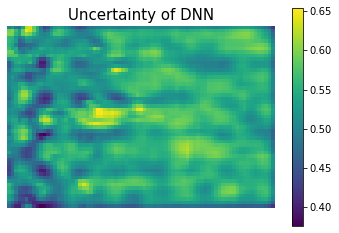

<Figure size 432x288 with 0 Axes>

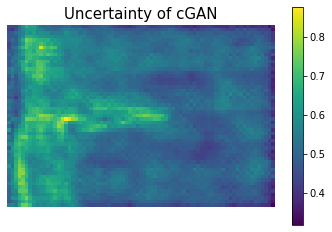

In [42]:
Num_Sample = 1000
Xbeta = np.mean(Tn.d, axis=0)
randind = np.random.randint(0,Tn.d.shape[0], size=(Num_Sample,))
#sui = Tn.d[randind]
#sui -= np.mean(Tn.d, axis=0)
sui = np.random.normal(0, 1, (1000, 3825))
sui = sui.dot(0.15*Tn.Cov.T)
Hsui = (H.dot(sui.T)).T
print(Hsui.shape)
Hsui += np.random.normal(0,0.1, Hsui.shape)
yHsui = Label - Hsui





########
s_sui = Tn.model['L1'].predict(yHsui) + sui
plt.imshow(np.reshape(np.std(s_sui, axis=0), (51, 75)))
plt.axis('off')
uq = np.reshape(np.std(s_sui, axis=0), (51, 75))
plt.title('Uncertainty of DNN', fontsize=15)
plt.colorbar()
plt.figure()

NumofSampling=1000
labeldim=96
dataset = [Tn.d, Tn.v]
latent_points, labels = generate_latent_points(dataset, 59, NumofSampling)
Label2=(yHsui-LABELMEAN)/LABELSTD
TT=np.zeros((NumofSampling,labeldim))
print(Label2.shape)
TT[0:,:]=Label2
s_sui= cgan_model.predict([latent_points, TT])
s_sui  = np.reshape(s_sui, (s_sui.shape[0], num_y * num_x))
s_sui  = IMAGEMEAN+s_sui*IMAGESTD

uq_cgan = np.reshape(np.std(s_sui,axis=0), (51, 75))
plt.figure()
plt.imshow(uq_cgan)
plt.axis('off')
plt.title('Uncertainty of cGAN', fontsize=15)
plt.colorbar()

In [ ]:
print(s_sui.shape)
XXT = s_sui.T.dot(s_sui)
EXXT = XXT / Num_Sample
print(XXT.shape)
EX = np.reshape(np.mean(s_sui, axis=0),(3825,1))
EXEXT = EX.dot(EX.T)
print(EXEXT.shape)
Qpos = EXXT - EXEXT
plt.imshow(np.reshape((np.diag(Qpos))**(0.5), (51,75)))
plt.colorbar()

In [ ]:
 
Tn.CreateResnet(Hidden_layer, fname, Reg, 'L1', 'Res')    
    
Tn.error = Tn.error ** (1/4)


mean = np.mean(Tn.error, axis=0)
std = np.std(Tn.error, axis=0)
Tn.error = np.divide((Tn.error - mean),np.reshape(std, (Tn.error.shape[1])))
Tn.TrainResnet(tf.compat.v1.train.AdamOptimizer(0.00001), 2, 'Res',los3)
Tn.TrainResnet(tf.compat.v1.train.AdamOptimizer(0.000001), 2, 'Res',los3)


Tn.TrainResnet(tf.compat.v1.train.AdamOptimizer(0.0000001), 2, 'Res', los3)

In [ ]:
 ind = np.random.randint(0, 100000)
 trr=(np.copy(np.reshape(Tn.error[ind,:], (m,n))))
 tvv = TakeAverage2(trr, Tn.num_y, Tn.num_x, Tn.ny_s, Tn.nx_s)

 #rr+=jump0
 Label=np.reshape(tvv, (1,tvv.shape[0]*tvv.shape[1]))
 Label=Concat(Tn.Sparse(trr), Label)
 dlr=Tn.model['Res'].predict(np.reshape(Label, (1, Label.shape[1])))
 dlr=np.reshape(dlr,(m,n))
 plt.imshow(trr, vmax=2)
 plt.colorbar()
 plt.figure()
 plt.imshow(dlr)
 plt.colorbar()
 print(np.mean((dlr-trr)**2)**0.5)

In [ ]:
print(np.min(trr))

In [ ]:
import tensorflow_probability as tfp

In [ ]:
def function_factory(model, loss, train_x, train_y):
    """A factory to create a function required by tfp.optimizer.lbfgs_minimize.

    Args:
        model [in]: an instance of `tf.keras.Model` or its subclasses.
        loss [in]: a function with signature loss_value = loss(pred_y, true_y).
        train_x [in]: the input part of training data.
        train_y [in]: the output part of training data.

    Returns:
        A function that has a signature of:
            loss_value, gradients = f(model_parameters).
    """

    # obtain the shapes of all trainable parameters in the model
    shapes = tf.shape_n(model.trainable_variables)
    n_tensors = len(shapes)

    # we'll use tf.dynamic_stitch and tf.dynamic_partition later, so we need to
    # prepare required information first
    count = 0
    idx = [] # stitch indices
    part = [] # partition indices

    for i, shape in enumerate(shapes):
        n = np.product(shape)
        idx.append(tf.reshape(tf.range(count, count+n, dtype=tf.int32), shape))
        part.extend([i]*n)
        count += n

    part = tf.constant(part)

    @tf.function
    def assign_new_model_parameters(params_1d):
        """A function updating the model's parameters with a 1D tf.Tensor.

        Args:
            params_1d [in]: a 1D tf.Tensor representing the model's trainable parameters.
        """

        params = tf.dynamic_partition(params_1d, part, n_tensors)
        for i, (shape, param) in enumerate(zip(shapes, params)):
            model.trainable_variables[i].assign(tf.reshape(param, shape))

    # now create a function that will be returned by this factory
    @tf.function
    def f(params_1d):
        """A function that can be used by tfp.optimizer.lbfgs_minimize.

        This function is created by function_factory.

        Args:
           params_1d [in]: a 1D tf.Tensor.

        Returns:
            A scalar loss and the gradients w.r.t. the `params_1d`.
        """

        # use GradientTape so that we can calculate the gradient of loss w.r.t. parameters
        with tf.GradientTape() as tape:
            # update the parameters in the model
            assign_new_model_parameters(params_1d)
            # calculate the loss
            loss_value = loss(model(train_x, training=True), train_y)

        # calculate gradients and convert to 1D tf.Tensor
        grads = tape.gradient(loss_value, model.trainable_variables)
        grads = tf.dynamic_stitch(idx, grads)

        # print out iteration & loss
        f.iter.assign_add(1)
        tf.print("Iter:", f.iter, "loss:", loss_value)

        return loss_value, grads

    # store these information as members so we can use them outside the scope
    f.iter = tf.Variable(0)
    f.idx = idx
    f.part = part
    f.shapes = shapes
    f.assign_new_model_parameters = assign_new_model_parameters

    return f

In [ ]:


Tn.CreateNetwork(Hidden_layer, fname, Reg, 'Original')
Tn.TrainNetwork(tf.compat.v1.train.AdamOptimizer(0.001), 2, 'Original',los3)
pred_model = Tn.model['Original']

loss_fun = tf.keras.losses.MeanSquaredError()
inp = np.float32(Tn.v)
otp = np.float32(Tn.d)
func = function_factory(pred_model, loss_fun, inp[0:100000,:], otp[0:100000,:])

# convert initial model parameters to a 1D tf.Tensor
init_params = tf.dynamic_stitch(func.idx, pred_model.trainable_variables)

# train the model with L-BFGS solver

results = tfp.optimizer.lbfgs_minimize(
    value_and_gradients_function=func, initial_position=init_params, max_iterations=500)

# after training, the final optimized parameters are still in results.position
# so we have to manually put them back to the model
func.assign_new_model_parameters(results.position)

# do some prediction
pred_outs = pred_model.predict(inps)

In [ ]:
tf.config.experimental.list_physical_devices()

In [ ]:
print(Tn.v.shape)

In [50]:
ttjump=np.load('Regfile.npy')

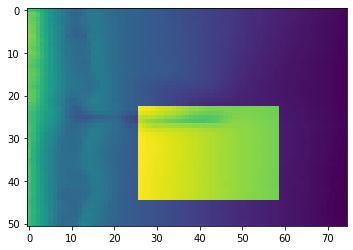

In [51]:
plt.imshow(ttjump)

In [332]:
rdl = np.zeros(15)
rk = np.zeros(15)
rgan = np.zeros(15)
i=0
for ind in np.arange(240,255):
#rr=np.reshape(Tn.d[3*ind+1,:],(m,n))
#ind=0
#rr=-np.copy(np.reshape(Tn.d[ind,:], (m,n)))
    rr=(np.copy(np.reshape(depth[ind,:], (m,n))))
    x,y=np.meshgrid(Tn.xx2,Tn.yy2,sparse=False)
    jump,x0, y0=random_jump_v(x,y,1,0.15, 0.5, 24)
    jump=np.abs(jump)
    original = np.copy(rr)
    #rr+=jump

    #rr = np.copy(rr)+np.random.normal(0,0.1,rr0.shape)
    vv = TakeAverage2(rr, Tn.num_y, Tn.num_x, Tn.ny_s, Tn.nx_s)
    vv2  = TakeAverage2(original, Tn.num_y, Tn.num_x, Tn.ny_s, Tn.nx_s)
    #rr+=jump
    Label=np.reshape(vv, (1,vv.shape[0]*vv.shape[1]))
    Label=Concat(Tn.Sparse(rr), Label)
    Label += np.random.normal(0,0.1, Label.shape)
    Label2=np.reshape(vv2, (1,vv2.shape[0]*vv2.shape[1]))
    Label2=Concat(Tn.Sparse(original), Label2)
    #dl=Tn.model['L1'].predict(np.reshape(Label, (1, Label.shape[1])))
    dl=Tn.model['L1'].predict(np.reshape(Label, (1, Label.shape[1])))
    dl=np.reshape(dl,(m,n))

    NumofSampling=1000
    labeldim=96
    dataset = [Tn.d, Tn.v]
    latent_points, labels = generate_latent_points(dataset, 59, NumofSampling)
    Label2=(Label-LABELMEAN)/LABELSTD
    TT=np.zeros((NumofSampling,labeldim))
    TT[0:,:]=Label2

    X  = cgan_model.predict([latent_points, TT])
    X  = np.reshape(X, (X.shape[0], num_y * num_x))
    X  = IMAGEMEAN+X*IMAGESTD
    X_mean = np.mean(X,axis=0)
    X_mean = np.reshape(X_mean, (51,75))


    mu_g = np.mean(y)*np.ones(num_y*num_x)
    mu_gt = np.mean(depth[:240,:], axis=0)
    #mu_gt = np.mean(y)*np.ones(num_y*num_x)
    y = np.reshape(Label,(Label.size))
    y2 = H.dot(np.reshape(original, (3825, 1)))+np.random.normal(0,0.1,(96,1))
    y2 = np.reshape(y2, (96,))
    mu = np.reshape(dl, (num_y*num_x))
    #mu = np.reshape(X_mean, (num_y*num_x))
    xx3 = mu_gt + Qsy.dot(H.T.dot(Rinv.dot(y-H.dot(mu_gt))))
    xx = mu + Qsy.dot(H.T.dot(Rinv.dot(y-H.dot(mu))))
    xx = np.reshape(xx,(num_y,num_x))
    xx3 = np.reshape(xx3,(num_y,num_x)) 
    gt = mu_gt + Qsy_g.dot(H.T.dot(Rinv.dot(y2-H.dot(mu_gt)))) 
    gt=np.reshape(gt,(51,75))
    rdl[i]=np.mean((rr-dl)**2)**(0.5)
    rk[i]=np.mean((rr-xx3)**2)**(0.5)
    rgan[i]=np.mean((rr-X_mean)**2)**(0.5)
    i+=1

In [ ]:
print(rdl)
print(rk)

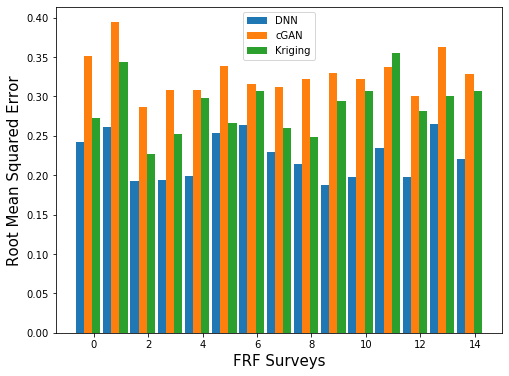

In [334]:
xxx = np.arange(15)
width = 0.3
plt.figure(figsize=(8,6))
plt.bar(xxx-width*5/3, rdl, width, label='DNN')
plt.bar(xxx-width*2/3, rgan, width, label='cGAN')
plt.bar(xxx+width/3, rk, width, label='Kriging')
plt.xlabel('FRF Surveys', fontsize=15)
plt.ylabel('Root Mean Squared Error', fontsize=15)
plt.legend()
plt.savefig('OverallBenchmark.pdf', bbox_inches='tight')

In [ ]:
print(xxx)

In [ ]:
print(rgan.shape)

In [76]:
np.save('Regfile2.npy',rr)

In [131]:
np.save('SurveryRegfile.npy',rr)

In [290]:
np.save('Regjump.npy',jump)

In [79]:
print(ind)

255


In [82]:
bathytime[255]

'SurveyFull/FRF_20170411_1133_FRF_NAVD88_LARC_GPS_UTC_v20170412_grid_latlon.txt'

In [118]:
depth.shape

(271, 3825)

In [121]:
Q00

array([[-131178.68012953, -131186.76562953, -131193.66662953, ...,
        -131246.40262953, -131246.71162953, -131246.96912953],
       [-131186.76562953, -131192.38622953, -131197.18342953, ...,
        -131233.84262953, -131234.05742953, -131234.23642953],
       [-131193.66662953, -131197.18342953, -131200.18502953, ...,
        -131223.12262953, -131223.25702953, -131223.36902953],
       ...,
       [-131246.40262953, -131233.84262953, -131223.12262953, ...,
        -131141.20262953, -131140.72262953, -131140.32262953],
       [-131246.71162953, -131234.05742953, -131223.25702953, ...,
        -131140.72262953, -131140.23902953, -131139.83602953],
       [-131246.96912953, -131234.23642953, -131223.36902953, ...,
        -131140.32262953, -131139.83602953, -131139.43052953]])

In [122]:
EXXT

array([[ 26.5225,  18.437 ,  11.536 , ..., -41.2   , -41.509 , -41.7665],
       [ 18.437 ,  12.8164,   8.0192, ..., -28.64  , -28.8548, -29.0338],
       [ 11.536 ,   8.0192,   5.0176, ..., -17.92  , -18.0544, -18.1664],
       ...,
       [-41.2   , -28.64  , -17.92  , ...,  64.    ,  64.48  ,  64.88  ],
       [-41.509 , -28.8548, -18.0544, ...,  64.48  ,  64.9636,  65.3666],
       [-41.7665, -29.0338, -18.1664, ...,  64.88  ,  65.3666,  65.7721]])

In [123]:
EXEXT

131205.2026295338

In [125]:
EX.shape

(3825,)

In [143]:
Qin

array([[-2.77788074e+13,  5.58260687e+12, -1.68733336e+13, ...,
         2.00503006e+13,  1.21992087e+13, -1.94698188e+13],
       [ 8.29857090e+13, -5.65824539e+13, -6.46870832e+12, ...,
         2.25636191e+13, -1.73165677e+12,  1.27213769e+13],
       [-1.53490865e+14,  1.41422419e+14, -5.66790035e+13, ...,
        -3.01021862e+13,  3.85952161e+13,  6.96319996e+12],
       ...,
       [-1.29410772e+13,  2.19072796e+13, -1.61839217e+12, ...,
        -4.75545787e+12,  9.60857788e+12,  5.05035908e+12],
       [-1.82513830e+13,  2.28235380e+13, -1.23864013e+13, ...,
        -4.98779716e+12,  5.86817748e+12, -1.92645621e+12],
       [-2.68779272e+12,  9.31030036e+11, -9.55083019e+12, ...,
        -4.25706380e+11, -7.80940401e+10, -7.27390842e+11]])

In [157]:
SUM

array([[ 26.5225,  18.437 ,  11.536 , ..., -41.2   , -41.509 , -41.7665],
       [ 18.437 ,  12.8164,   8.0192, ..., -28.64  , -28.8548, -29.0338],
       [ 11.536 ,   8.0192,   5.0176, ..., -17.92  , -18.0544, -18.1664],
       ...,
       [-41.2   , -28.64  , -17.92  , ...,  64.    ,  64.48  ,  64.88  ],
       [-41.509 , -28.8548, -18.0544, ...,  64.48  ,  64.9636,  65.3666],
       [-41.7665, -29.0338, -18.1664, ...,  64.88  ,  65.3666,  65.7721]])

In [158]:
Tn.Cov

array([[1.00000000e+000, 9.64369095e-001, 8.64914417e-001, ...,
        1.34068912e-167, 6.95992049e-170, 3.36021481e-172],
       [9.64369095e-001, 1.00000000e+000, 9.64369095e-001, ...,
        2.40180894e-165, 1.34068912e-167, 6.95992049e-170],
       [8.64914417e-001, 9.64369095e-001, 1.00000000e+000, ...,
        4.00161588e-163, 2.40180894e-165, 1.34068912e-167],
       ...,
       [1.34068912e-167, 2.40180894e-165, 4.00161588e-163, ...,
        1.00000000e+000, 9.64369095e-001, 8.64914417e-001],
       [6.95992049e-170, 1.34068912e-167, 2.40180894e-165, ...,
        9.64369095e-001, 1.00000000e+000, 9.64369095e-001],
       [3.36021481e-172, 6.95992049e-170, 1.34068912e-167, ...,
        8.64914417e-001, 9.64369095e-001, 1.00000000e+000]])

In [159]:
Tn.Cov.shape

(3825, 3825)

In [160]:
Tn.v.shape

(143400, 96)

In [161]:
Tn.d.shape

(143400, 3825)

In [176]:
NUM_SAMPLE = 100

SAMPLES = Tn.d[:NUM_SAMPLE, :]

## Compute Numerical Covariance
EXXT = np.zeros((3825, 3825))
EXEXT = np.zeros((3825, 3825))
for i in range(NUM_SAMPLE):
    EXXT += SAMPLES[i,:].dot(SAMPLES[i,:].T)
    
EXXT /= NUM_SAMPLE
EX = np.reshape(np.mean(SAMPLES, axis=0), (1, 3825))
EXEXT = EX.dot(EX.T)
COV_N = EXXT - EXEXT
Q_INV = np.linalg.inv(COV_N + 0.00001 * Identity)

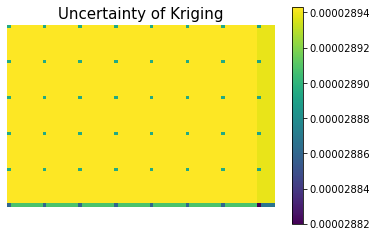

In [177]:
QSYINV = Q_INV+H.T.dot((H.T.dot(Rinv.T)).T)
QSY = np.linalg.inv(QSYINV)
plt.imshow(np.reshape(np.diag(QSY),(51,75)))
plt.axis('off')
plt.title('Uncertainty of Kriging', fontsize=15)
plt.colorbar()

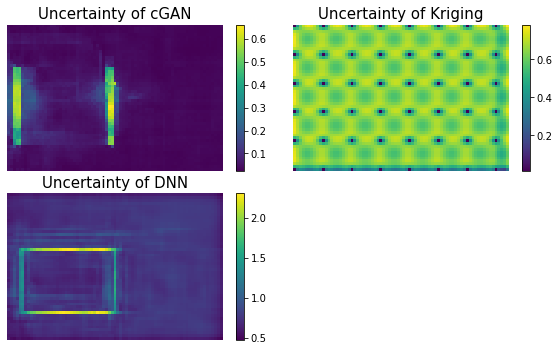

In [289]:
fig = plt.figure(figsize=(10,12))
iplot=420

ax = fig.add_subplot(421)
im = ax.imshow(uq_cgan)
ax.set_title('Uncertainty of cGAN', fontsize=15)
ax.set_axis_off()
cbar = fig.colorbar(im)
ax = fig.add_subplot(422)
im = ax.imshow(uq_k)
ax.set_title('Uncertainty of Kriging', fontsize=15)
ax.set_axis_off()
cbar = fig.colorbar(im)

ax = fig.add_subplot(423)
im = ax.imshow(uq)
ax.set_title('Uncertainty of DNN', fontsize=15)
ax.set_axis_off()
cbar = fig.colorbar(im)
#cb_ax = fig.add_axes([0.95, 0.02, 0.02, 0.85])
#cbar = fig.colorbar()
plt.subplots_adjust(hspace=0.15, wspace=0.05)
plt.savefig('Uncertainty.pdf', bbox_inches='tight')
plt.show()

In [342]:
cgan_model.summary()

Model: "model_2"
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_4 (InputLayer)            (None, 59)           0                                            
__________________________________________________________________________________________________
dense_4 (Dense)                 (None, 8064)         483840      input_4[0][0]                    
__________________________________________________________________________________________________
input_3 (InputLayer)            (None, 96)           0                                            
__________________________________________________________________________________________________
leaky_re_lu_3 (LeakyReLU)       (None, 8064)         0           dense_4[0][0]                    
____________________________________________________________________________________________

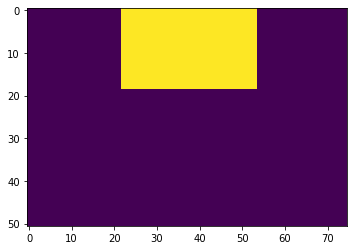

In [351]:


ind =57
plt.imshow(np.reshape(Tn.d[3*ind,:], (51,75)))


In [352]:
np.reshape(Tn.d[3*ind,:], (51,75))

array([[ 8.19834560e-117, -2.95438547e-045, -5.29255562e-045, ...,
        -6.52682316e-045, -5.29255562e-045, -2.95438547e-045],
       [ 4.94064031e-117,  8.79083628e-031,  1.75662505e-030, ...,
         2.63108474e-030,  1.75662505e-030,  8.79083628e-031],
       [-2.24352940e-117,  1.63944214e-030,  3.27600814e-030, ...,
         4.90682692e-030,  3.27600814e-030,  1.63944214e-030],
       ...,
       [ 7.64486109e-117, -2.17838491e-030, -4.35294819e-030, ...,
        -6.51987492e-030, -4.35294819e-030, -2.17838491e-030],
       [ 2.24368503e-117, -1.63944214e-030, -3.27600814e-030, ...,
        -4.90682692e-030, -3.27600814e-030, -1.63944214e-030],
       [-4.94067696e-117, -8.79083628e-031, -1.75662505e-030, ...,
        -2.63108474e-030, -1.75662505e-030, -8.79083628e-031]])

In [353]:
np.max(Tn.d[3*ind,:])

12.0